In [1]:
import pandas as pd
import numpy as np
import tcc_utils

from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

Using TensorFlow backend.


In [2]:
import tratamento_dados_empresa

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa.get_scaled_splits_and_scaler(
    x_csv_path, y_csv_path, 0.2, 0)

In [3]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
glorot_uniform = gl_uni(seed=0)
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)

In [67]:
linear_model = tcc_utils.linear_model(x_train, random_uniform)

<Figure size 576x432 with 0 Axes>

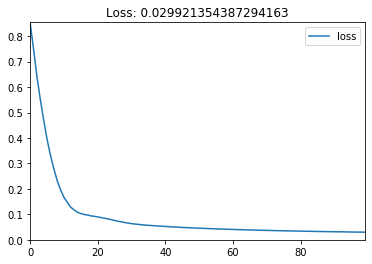

In [68]:
linear_history = linear_model.fit(x_train, y_train, epochs=100, verbose=0)
tcc_utils.plot_loss(linear_history)

<Figure size 576x432 with 0 Axes>

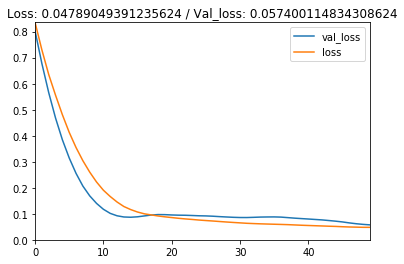

In [66]:
linear_history_with_val = linear_model.fit(x_train, y_train, validation_split=0.2, epochs=50, verbose=0)
tcc_utils.plot_loss_with_validation(linear_history_with_val)

In [69]:
# Evaluating model against Training and Test set
linr_train_eval = linear_model.evaluate(x_train, y_train, verbose=0)
linr_test_eval = linear_model.evaluate(x_test, y_test, verbose=0)
print(f'MSE of training set using Linear model: {linr_train_eval}')
print(f'MSE of testing set using Linear model: {linr_test_eval}')

MSE of training set using Linear model: 0.029790099371563305
MSE of testing set using Linear model: 0.14062665402889252


In [ ]:
X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)
tcc_utils.linear_model_weighs_table(linear_model, X)

In [70]:
prediction_results = tcc_utils.prediction_results_data_frame(x_test, y_test, linear_model, y_scaler)
print(prediction_results)

    Prediction      Real     % error
0     6.645180  8.075241   17.709202
1     4.236459  3.669486   15.451017
2     5.058396  4.616062    9.582498
3     2.421391  3.003443   19.379504
4     1.570627  0.667981  135.130483
5     0.953269  0.900556    5.853353
6     5.002497  3.491649   43.270324
7     6.289382  5.156991   21.958384
8     7.004307  8.491036   17.509391
9     4.548274  4.785659    4.960346
10    1.623693  1.377930   17.835625


In [9]:
layers=[32, 16, 8]
activations=['relu', 'relu', 'relu']

deep_model = tcc_utils.deep_model(x_train, glorot_uniform, layers, activations)


<Figure size 576x432 with 0 Axes>

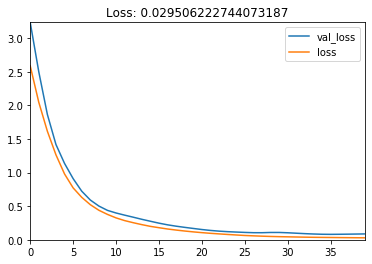

In [10]:
deep_history = deep_model.fit(x_train, y_train, epochs=40, validation_split=0.2, verbose=0)
tcc_utils.plot_loss(deep_history)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 57        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1824      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 2,497
Trainable p

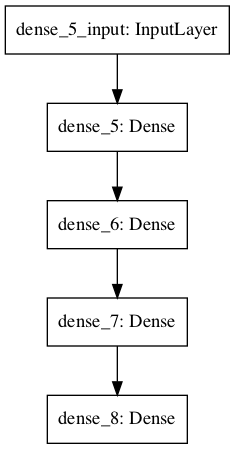

In [13]:
# summarize layers
print(linear_model.summary())
print(deep_model.summary())
# plot graph
from keras.utils import plot_model
# plot_model(deep_model, to_file='multilayer_perceptron_graph.png')
plot_model(deep_model)

    Prediction      Real     % error
4     1.570627  0.667981  135.130483
5     0.953269  0.900556    5.853353
10    1.623693  1.377930   17.835625
3     2.421391  3.003443   19.379504
6     5.002497  3.491649   43.270324
1     4.236459  3.669486   15.451017
2     5.058396  4.616062    9.582498
9     4.548274  4.785659    4.960346
7     6.289382  5.156991   21.958384
0     6.645180  8.075241   17.709202
8     7.004307  8.491036   17.509391


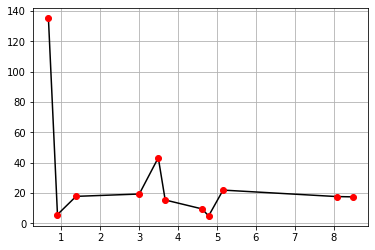

In [71]:
prediction_results = tcc_utils.prediction_results_data_frame(x_test, y_test, linear_model, y_scaler)
prediction_results.sort_values('Real', ascending=True, inplace=True)
print(prediction_results)
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(prediction_results['Real'], prediction_results['% error'], 'k',
        prediction_results['Real'], prediction_results['% error'], 'ro')
plt.yscale('linear')
plt.grid(True)
plt.show()

    Prediction      Real    % error
4     1.067951  0.667981  59.877378
5     0.971516  0.900556   7.879586
10    1.901559  1.377930  38.001049
3     2.835420  3.003443   5.594347
6     4.752436  3.491649  36.108649
1     3.737392  3.669486   1.850567
2     3.237335  4.616062  29.868029
9     5.243757  4.785659   9.572307
7     5.623794  5.156991   9.051848
0     6.965249  8.075241  13.745625
8     7.507805  8.491036  11.579631


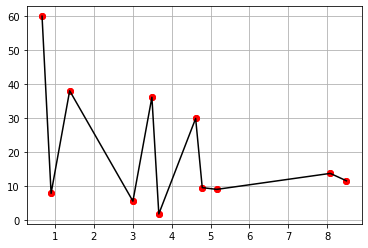

In [51]:
prediction_results = tcc_utils.prediction_results_data_frame(x_test, y_test, deep_model, y_scaler)
prediction_results.sort_values('Real', ascending=True, inplace=True)
print(prediction_results)
plt.plot(prediction_results['Real'], prediction_results['% error'], 'ro')
plt.plot(prediction_results['Real'], prediction_results['% error'], 'ro',
        prediction_results['Real'], prediction_results['% error'], 'k')
#plt.yscale('log')
plt.grid(True)
plt.show()
#plt.scatter('a', 'b', c='c', s='d', data=data)

In [50]:
tcc_utils.plot_compare_histories([linear_history, deep_history])

AttributeError: module 'tcc_utils' has no attribute 'plot_compare_histories'

In [33]:
import numpy as np
import tcc_utils
import tratamento_dados_empresa
from sklearn.preprocessing import StandardScaler
from keras.initializers import glorot_normal as gl_normal

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)
x_int_index = x.reset_index()

number_hidden_layer = round(x.shape[1]*1.5)

# Feature Scaling X
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)
# Feature Scaling y
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x, glorot_normal, layers, activations)


results = np.array([])

for i in range(x.shape[0]):
    x_train = np.delete(x, i, 0)
    y_train = np.delete(y, i, 0)
    x_test = x[i:i+1]
    y_test = y[i:i+1]
    deep_model.train_on_batch(x_train, y_train)
    predictions_real = y_scaler.inverse_transform(deep_model.predict(x_test))
    y_real = y_scaler.inverse_transform(y_test)
    results = np.append([results], [[tcc_utils.calculate_diff_percent(predictions_real[0,0], y_real[0,0])]])
    print(f'R$ {predictions_real[0,0]} - R$ {y_real[0,0]} - error: {tcc_utils.calculate_diff_percent(predictions_real[0,0], y_real[0,0])}')

R$ 3.4289333820343018 - R$ 1.026738689 - error: 233.96358964265167
R$ 1.8961750268936157 - R$ 0.8603665941999998 - error: 120.39152143706234
R$ 2.6734678745269775 - R$ 0.9005563231 - error: 196.8684807324493
R$ -0.46146509051322937 - R$ 1.1752936440000004 - error: 139.26381231354887
R$ 0.1291203647851944 - R$ 1.3779304800000003 - error: 90.62939918527715
R$ -1.3360106945037842 - R$ 1.311384023 - error: 201.87791455987443
R$ -1.5317614078521729 - R$ 1.3161578840000003 - error: 216.38128118770382
R$ -0.4739319980144501 - R$ 1.3062001300000001 - error: 136.28326066806088
R$ 0.6647961139678955 - R$ 1.1562058570000002 - error: 42.50192472706914
R$ -0.449602335691452 - R$ 1.0377015510000005 - error: 143.32674797085772
R$ 0.827307939529419 - R$ 0.9181082562000005 - error: 9.889935751846851
R$ 0.017070075497031212 - R$ 0.6679810606999999 - error: 97.4445270230951
R$ 1.037588119506836 - R$ 0.7225226334999997 - error: 43.606313684682156
R$ 1.0212650299072266 - R$ 1.0148586869999994 - error: 0.63

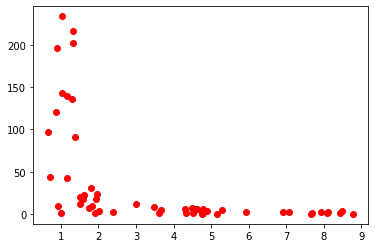

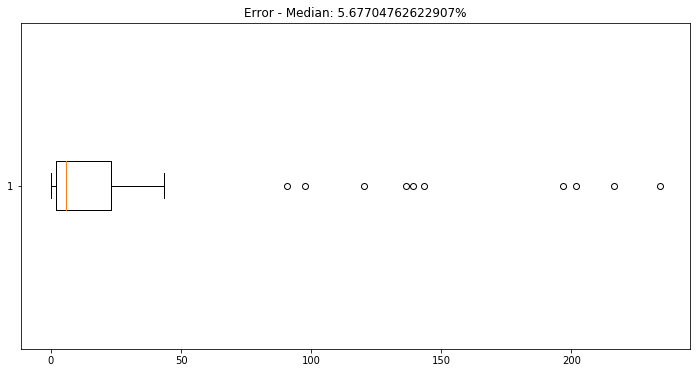

,0
count,55.000000
mean,35.144170
std,62.592106
min,0.010436
25%,1.770128
50%,5.677048
75%,23.134624
max,233.963590


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(y_scaler.inverse_transform(y),results, 'ro')
plt.show()

results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
plt.boxplot(results_df.iloc[:,0], vert=False)
plt.title(f'Error - Median: {results_df.iloc[:,0].median()}%')
plt.show()
results_df.describe()

In [8]:
import numpy as np
import tcc_utils
import tratamento_dados_empresa
from sklearn.preprocessing import StandardScaler
from keras.initializers import glorot_normal as gl_normal

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)
x_int_index = x.reset_index()

x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa.get_scaled_splits_and_scaler(
    x_csv_path, y_csv_path, 0.1, 0)

number_hidden_layer = round(x.shape[1]*1.5)

# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x, glorot_normal, layers, activations)


results = np.array([])

for i in range(x_train.shape[0]):
    x_train1 = np.delete(x_train, i, 0)
    y_train1 = np.delete(y_train, i, 0)
    x_test1 = x_train[i:i+1]
    y_test1 = y_train[i:i+1]
    deep_model.train_on_batch(x_train1, y_train1)
    predictions_real = y_scaler.inverse_transform(deep_model.predict(x_test1))
    y_real = y_scaler.inverse_transform(y_test1)
    results = np.append([results], [[tcc_utils.calculate_diff_percent(predictions_real[0,0], y_real[0,0])]])
    print(f'R$ {predictions_real[0,0]} - R$ {y_real[0,0]} - error: {tcc_utils.calculate_diff_percent(predictions_real[0,0], y_real[0,0])}')

R$ 4.817890644073486 - R$ 3.491648923 - error: 37.98324947096882
R$ 6.009188175201416 - R$ 5.156990634 - error: 16.52509383249379
R$ 6.665177345275879 - R$ 8.491035952999999 - error: 21.503366819204427
R$ 3.672144651412964 - R$ 4.785658811 - error: 23.267729764344796
R$ 0.05086049064993858 - R$ 1.3779304799999998 - error: 96.30892186593198
R$ 0.23776468634605408 - R$ 0.9181082562 - error: 74.10276133120193
R$ 5.295533657073975 - R$ 4.564561296 - error: 16.014077009208698
R$ 2.020409107208252 - R$ 1.5983038680000003 - error: 26.409573777509717
R$ 4.1110429763793945 - R$ 4.57179931 - error: 10.078227463151826
R$ 7.8505473136901855 - R$ 7.693246558999999 - error: 2.044660254729087
R$ 3.8962039947509766 - R$ 4.7944934230000005 - error: 18.735856929947523
R$ 0.7263630032539368 - R$ 1.3062001299999997 - error: 44.39113987425978
R$ 1.2718974351882935 - R$ 1.6110844599999998 - error: 21.053336012669778
R$ 2.7986865043640137 - R$ 3.6017053889999997 - error: 22.29551831442108
R$ 4.95979881286621

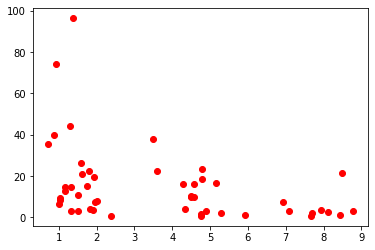

In [10]:
plt.plot(y_scaler.inverse_transform(y_train),results, 'ro')
plt.show()

In [11]:
prediction_results = tcc_utils.prediction_results_data_frame(x_test, y_test, deep_model, y_scaler)
prediction_results.sort_values(by='Real', ascending=False, inplace=True)
# Print and plot results
print(prediction_results)

   Prediction      Real     % error
0    7.143155  8.075241   11.542520
2    5.261053  4.616062   13.972750
1    2.972247  3.669486   19.001000
3    2.884259  3.003443    3.968260
5    2.325243  0.900556  158.200756
4   -0.605276  0.667981  190.612792


In [80]:
import numpy as np
import tcc_utils
import tratamento_dados_empresa
from sklearn.preprocessing import StandardScaler
from keras.initializers import glorot_normal as gl_normal

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)
x_int_index = x.reset_index()

number_hidden_layer = round(x.shape[1]*1.5)

last_3_x = x.iloc[x.shape[0] - 3:, :]
last_3_y = y.iloc[y.shape[0] - 3:, :]
x = x.iloc[:x.shape[0] - 3,:]
y = y.iloc[:y.shape[0] - 3,:]

# Feature Scaling X
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)
last_3_x = x_scaler.transform(last_3_x)
# Feature Scaling y
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)
last_3_y = y_scaler.transform(last_3_y)
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x, glorot_normal, layers, activations)


results = np.array([])

for i in range(x.shape[0]):
    x_train = np.delete(x, i, 0)
    y_train = np.delete(y, i, 0)
    x_test = x[i:i+1]
    y_test = y[i:i+1]
    deep_model.train_on_batch(x_train, y_train)
    predictions_real = y_scaler.inverse_transform(deep_model.predict(x_test))
    y_real = y_scaler.inverse_transform(y_test)
    results = np.append([results], [[tcc_utils.calculate_diff_percent(predictions_real[0,0], y_real[0,0])]])
    print(f'R$ {predictions_real[0,0]} - R$ {y_real[0,0]} - error: {tcc_utils.calculate_diff_percent(predictions_real[0,0], y_real[0,0])}')

R$ 3.4666335582733154 - R$ 1.026738689 - error: 237.63542714550567
R$ 2.118772029876709 - R$ 0.8603665941999998 - error: 146.2638652128074
R$ 2.8023290634155273 - R$ 0.9005563231000004 - error: 211.17754564967376
R$ -0.26800259947776794 - R$ 1.1752936440000004 - error: 122.80303316928071
R$ 0.3098582327365875 - R$ 1.3779304800000003 - error: 77.51278186860432
R$ -1.129343867301941 - R$ 1.311384023 - error: 186.11847082888707
R$ -1.4001449346542358 - R$ 1.3161578840000003 - error: 206.3812291576286
R$ -0.37025341391563416 - R$ 1.3062001300000001 - error: 128.3458411473006
R$ 0.63782799243927 - R$ 1.1562058570000002 - error: 44.83439185352009
R$ -0.35249218344688416 - R$ 1.037701551 - error: 133.9685512763471
R$ 0.7718356847763062 - R$ 0.9181082562 - error: 15.931952516047298
R$ -0.10101232677698135 - R$ 0.6679810606999999 - error: 115.12203454857345
R$ 1.0032976865768433 - R$ 0.7225226335000001 - error: 38.86038167645071
R$ 1.0449601411819458 - R$ 1.0148586870000003 - error: 2.966073461

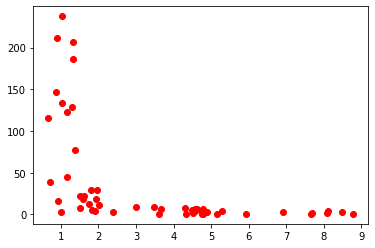

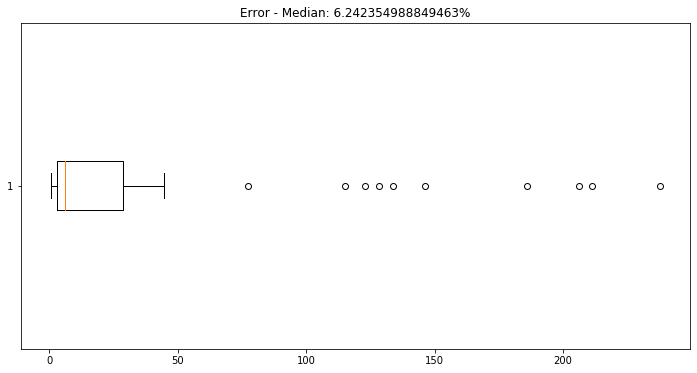

,0
count,52.000000
mean,37.332966
std,63.243304
min,0.681190
25%,2.910114
50%,6.242355
75%,28.837752
max,237.635427


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(y_scaler.inverse_transform(y),results, 'ro')
plt.show()

results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
plt.boxplot(results_df.iloc[:,0], vert=False)
plt.title(f'Error - Median: {results_df.iloc[:,0].median()}%')
plt.show()
results_df.describe()

   Prediction      Real   % error
0    7.977844  8.434865  5.418244
2    8.191524  7.930000  3.297901
1    7.133227  7.084401  0.689203


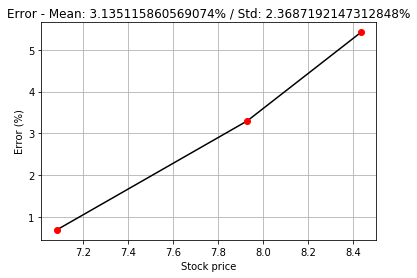

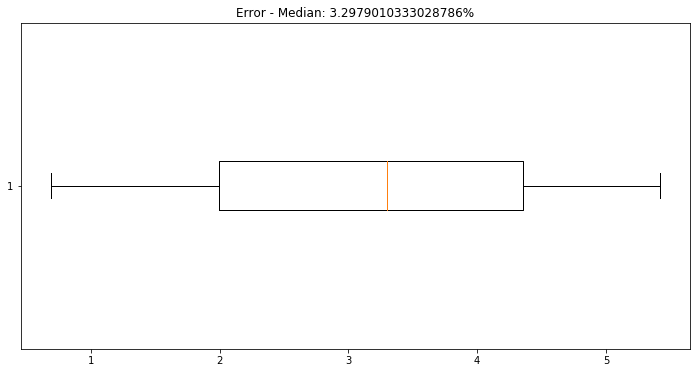

count    3.000000
mean     3.135116
std      2.368719
min      0.689203
25%      1.993552
50%      3.297901
75%      4.358072
max      5.418244
Name: % error, dtype: float64

In [82]:
prediction_results = tcc_utils.prediction_results_data_frame(last_3_x, last_3_y, deep_model, y_scaler)
sorted_pred = prediction_results.sort_values(by='Real', ascending=False)
# Print and plot results
print(sorted_pred)
plt.plot(sorted_pred['Real'], sorted_pred['% error'], 'k',
             sorted_pred['Real'], sorted_pred['% error'], 'ro')
plt.grid(True)
plt.title(f'Error - Mean: {sorted_pred["% error"].mean()}% / '
              f'Std: {sorted_pred["% error"].std()}%')
plt.xlabel('Stock price')
plt.ylabel('Error (%)')
plt.show()
plt.figure(figsize=(12, 6))
plt.boxplot(prediction_results["% error"], vert=False)
plt.title(f'Error - Median: {sorted_pred["% error"].median()}%')
plt.show()
sorted_pred['% error'].describe()

   Prediction      Real   % error
0    7.977844  8.434865  5.418244
1    7.133227  7.084401  0.689203
2    8.191524  7.930000  3.297901


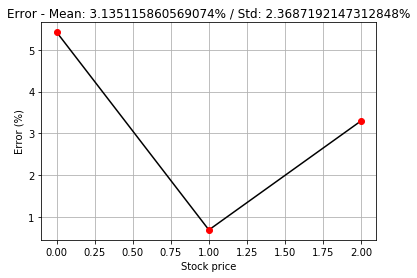

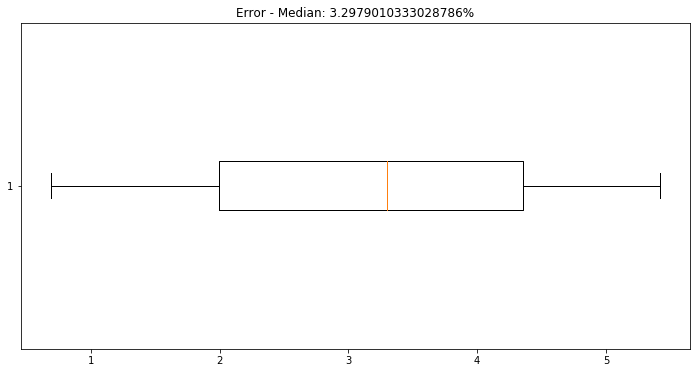

count    3.000000
mean     3.135116
std      2.368719
min      0.689203
25%      1.993552
50%      3.297901
75%      4.358072
max      5.418244
Name: % error, dtype: float64

In [83]:
prediction_results = tcc_utils.prediction_results_data_frame(last_3_x, last_3_y, deep_model, y_scaler)
sorted_pred = prediction_results.sort_values(by='Real', ascending=False)
# Print and plot results
print(prediction_results)
plt.plot(prediction_results.index, prediction_results['% error'], 'k',
             prediction_results.index, prediction_results['% error'], 'ro')
plt.grid(True)
plt.title(f'Error - Mean: {prediction_results["% error"].mean()}% / '
              f'Std: {prediction_results["% error"].std()}%')
plt.xlabel('Stock price')
plt.ylabel('Error (%)')
plt.show()
plt.figure(figsize=(12, 6))
plt.boxplot(prediction_results["% error"], vert=False)
plt.title(f'Error - Median: {prediction_results["% error"].median()}%')
plt.show()
prediction_results['% error'].describe()

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import tcc_utils
import tratamento_dados_empresa
from sklearn.preprocessing import StandardScaler
from keras.initializers import glorot_normal as gl_normal
from sklearn.model_selection import KFold

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)


# Feature Scaling X
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)

# Feature Scaling y
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)

# Generate hidden layer # of nodes
number_hidden_layer = round(x.shape[1]*1.5)

# LOOCV: k-fold cross validation (folds=x.shape[0], shuffle=True, seed=1)
kfold = KFold(x.shape[0], True, 1)

# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)

# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']

# Create model
deep_model = tcc_utils.deep_model(x, glorot_normal, layers, activations)

i = 0
results_loss = np.array([])
results_val_loss = np.array([])

for train, test in kfold.split(x):
#    print(f'Fold: {i}')
    i += 1
    deep_history = deep_model.fit(x[train,:], y[train,:], validation_data=(x[test,:], y[test,:]), batch_size=4, epochs=10, verbose=0)
    results_loss = np.append([results_loss], [[deep_history.history["loss"][-1]]])
    results_val_loss = np.append([results_val_loss], [[deep_history.history["val_loss"][-1]]])


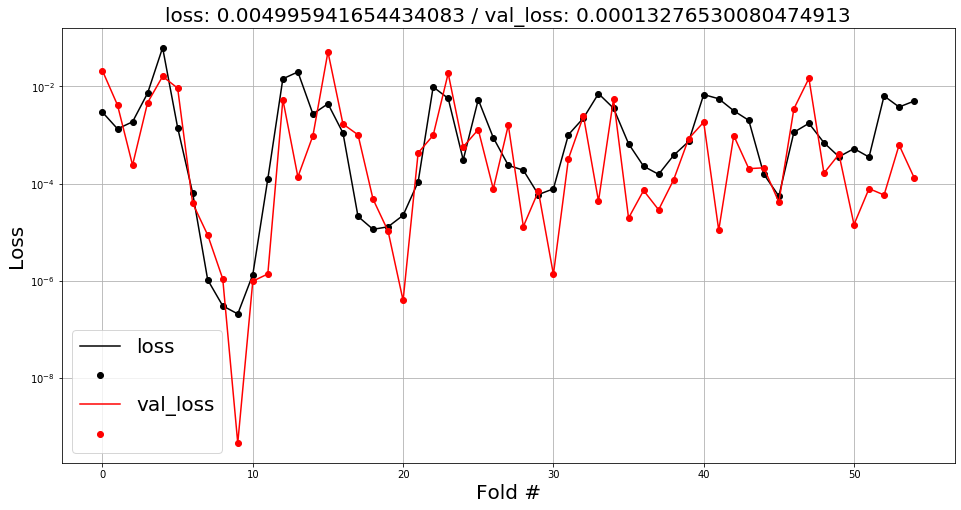

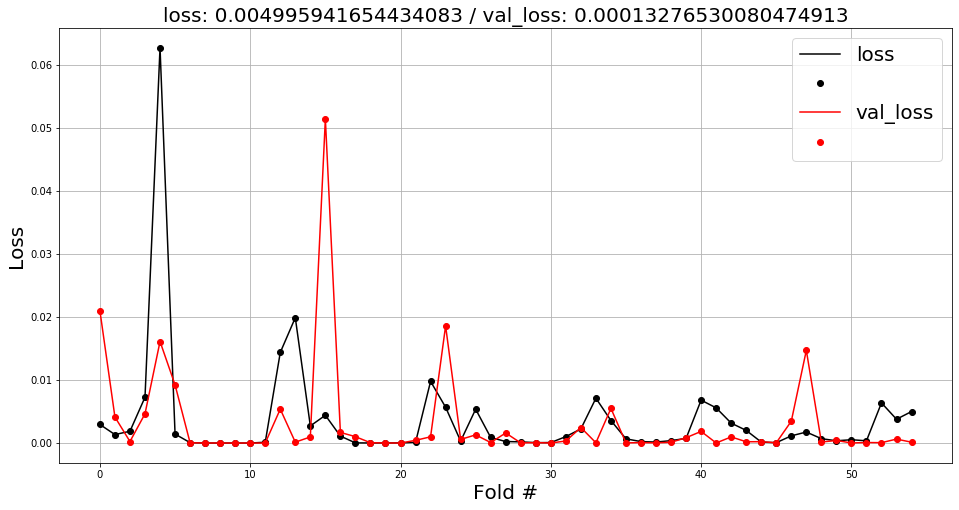

Stats: Mean (std)
loss: 0.003576465195590146 (0.008871254564466689)
val_loss: 0.00312589434953762 (0.008070974524595553)


In [92]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(results_loss)), results_loss, 'k')
plt.plot(range(len(results_loss)), results_loss, 'ko')
plt.plot(range(len(results_val_loss)), results_val_loss, 'r')
plt.plot(range(len(results_val_loss)), results_val_loss, 'ro')
plt.legend(['loss', '', 'val_loss', ''], fontsize=20)
plt.xlabel('Fold #', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title(f'loss: {results_loss[-1]} / val_loss: {results_val_loss[-1]}', fontsize=20)
plt.yscale('log')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 8))
plt.plot(range(len(results_loss)), results_loss, 'k')
plt.plot(range(len(results_loss)), results_loss, 'ko')
plt.plot(range(len(results_val_loss)), results_val_loss, 'r')
plt.plot(range(len(results_val_loss)), results_val_loss, 'ro')
plt.legend(['loss', '', 'val_loss', ''], fontsize=20)
plt.xlabel('Fold #', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title(f'loss: {results_loss[-1]} / val_loss: {results_val_loss[-1]}', fontsize=20)
plt.grid(True)
plt.show()

print(f'Stats: Mean (std)')
print(f'loss: {results_loss.mean()} ({results_loss.std()})')
print(f'val_loss: {results_val_loss.mean()} ({results_val_loss.std()})')

In [93]:
deep_history.history

{'val_loss': [0.001240336918272078,
  0.0013646325096488,
  1.057724603015231e-05,
  0.0016966847470030189,
  0.0005060465191490948,
  0.0035307600628584623,
  0.00299558462575078,
  0.00012874417006969452,
  0.006589366123080254,
  0.00013276530080474913],
 'loss': [0.0032125126648073397,
  0.0032377811752397705,
  0.003230807535281336,
  0.0069922091810170695,
  0.002019516191298694,
  0.0023286973214622034,
  0.003127503859879518,
  0.006051256383350982,
  0.008850798817110006,
  0.004995941654434083]}

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


<Figure size 576x432 with 0 Axes>

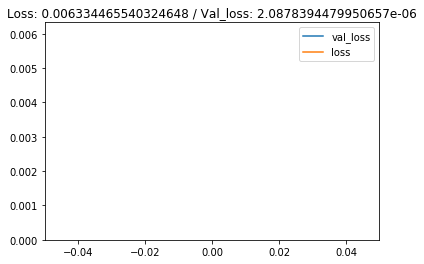

In [84]:
tcc_utils.plot_loss_with_validation(deep_history)